In [10]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_participant = 10
n_simulation = 100
SEED = 42  # Set a random seed for reproducibility

# Sample (individual-level) parameters from hierarchical prior distribution
with pm.Model() as model:
    # Group-level parameters with priors
    mu_mu_go = pm.TruncatedNormal('mu_mu_go', mu=500, sigma=50, lower=0.001, upper=1000, initval=500)
    sigma_mu_go = pm.Gamma('sigma_mu_go', alpha=8, beta=0.1, initval=80)
    mu_sigma_go = pm.TruncatedNormal('mu_sigma_go', mu=150, sigma=50, lower=1, upper=500, initval=150)
    sigma_sigma_go = pm.Gamma('sigma_sigma_go', alpha=8, beta=0.1, initval=80)
    mu_tau_go = pm.TruncatedNormal('mu_tau_go', mu=150, sigma=50, lower=1, upper=500, initval=150)
    sigma_tau_go = pm.Gamma('sigma_tau_go', alpha=8, beta=0.1, initval=80)

    mu_mu_stop = pm.TruncatedNormal('mu_mu_stop', mu=300, sigma=50, lower=0.001, upper=1000, initval=300)
    sigma_mu_stop = pm.Gamma('sigma_mu_stop', alpha=8, beta=0.1, initval=80)
    mu_sigma_stop = pm.TruncatedNormal('mu_sigma_stop', mu=150, sigma=50, lower=1, upper=500, initval=150)
    sigma_sigma_stop = pm.Gamma('sigma_sigma_stop', alpha=8, beta=0.1, initval=80)
    mu_tau_stop = pm.TruncatedNormal('mu_tau_stop', mu=150, sigma=50, lower=1, upper=500, initval=150)
    sigma_tau_stop = pm.Gamma('sigma_tau_stop', alpha=8, beta=0.1, initval=80)

    mu_p_tf = pm.TruncatedNormal('mu_p_tf', mu=0.05, sigma=0.1, lower=-1.5, upper=1.5, initval=0.05)
    sigma_p_tf = pm.Gamma('sigma_p_tf', alpha=2, beta=1, initval=2)

    # Participant-specific parameters
    mu_go = pm.TruncatedNormal('mu_go', mu=mu_mu_go, sigma=sigma_mu_go, lower=0.001, upper=1000, size=n_participant)
    sigma_go = pm.TruncatedNormal('sigma_go', mu=mu_sigma_go, sigma=sigma_sigma_go, lower=1, upper=500, size=n_participant)
    tau_go = pm.TruncatedNormal('tau_go', mu=mu_tau_go, sigma=sigma_tau_go, lower=1, upper=500, size=n_participant)
    mu_stop = pm.TruncatedNormal('mu_stop', mu=mu_mu_stop, sigma=sigma_mu_stop, lower=0.001, upper=1000, size=n_participant)
    sigma_stop = pm.TruncatedNormal('sigma_stop', mu=mu_sigma_stop, sigma=sigma_sigma_stop, lower=1, upper=500, size=n_participant)
    tau_stop = pm.TruncatedNormal('tau_stop', mu=mu_tau_stop, sigma=sigma_tau_stop, lower=1, upper=500, size=n_participant)

    p_tf_probit = pm.TruncatedNormal('p_tf_probit', mu=mu_p_tf, sigma=sigma_p_tf, lower=-1.5, upper=1.5, size=n_participant)
    p_tf = pm.Deterministic('p_tf', pm.math.invprobit(p_tf_probit))
    
    # Draw samples from the prior distribution
    draws = pm.draw([mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf], 
                    draws=n_simulation, random_seed=SEED)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

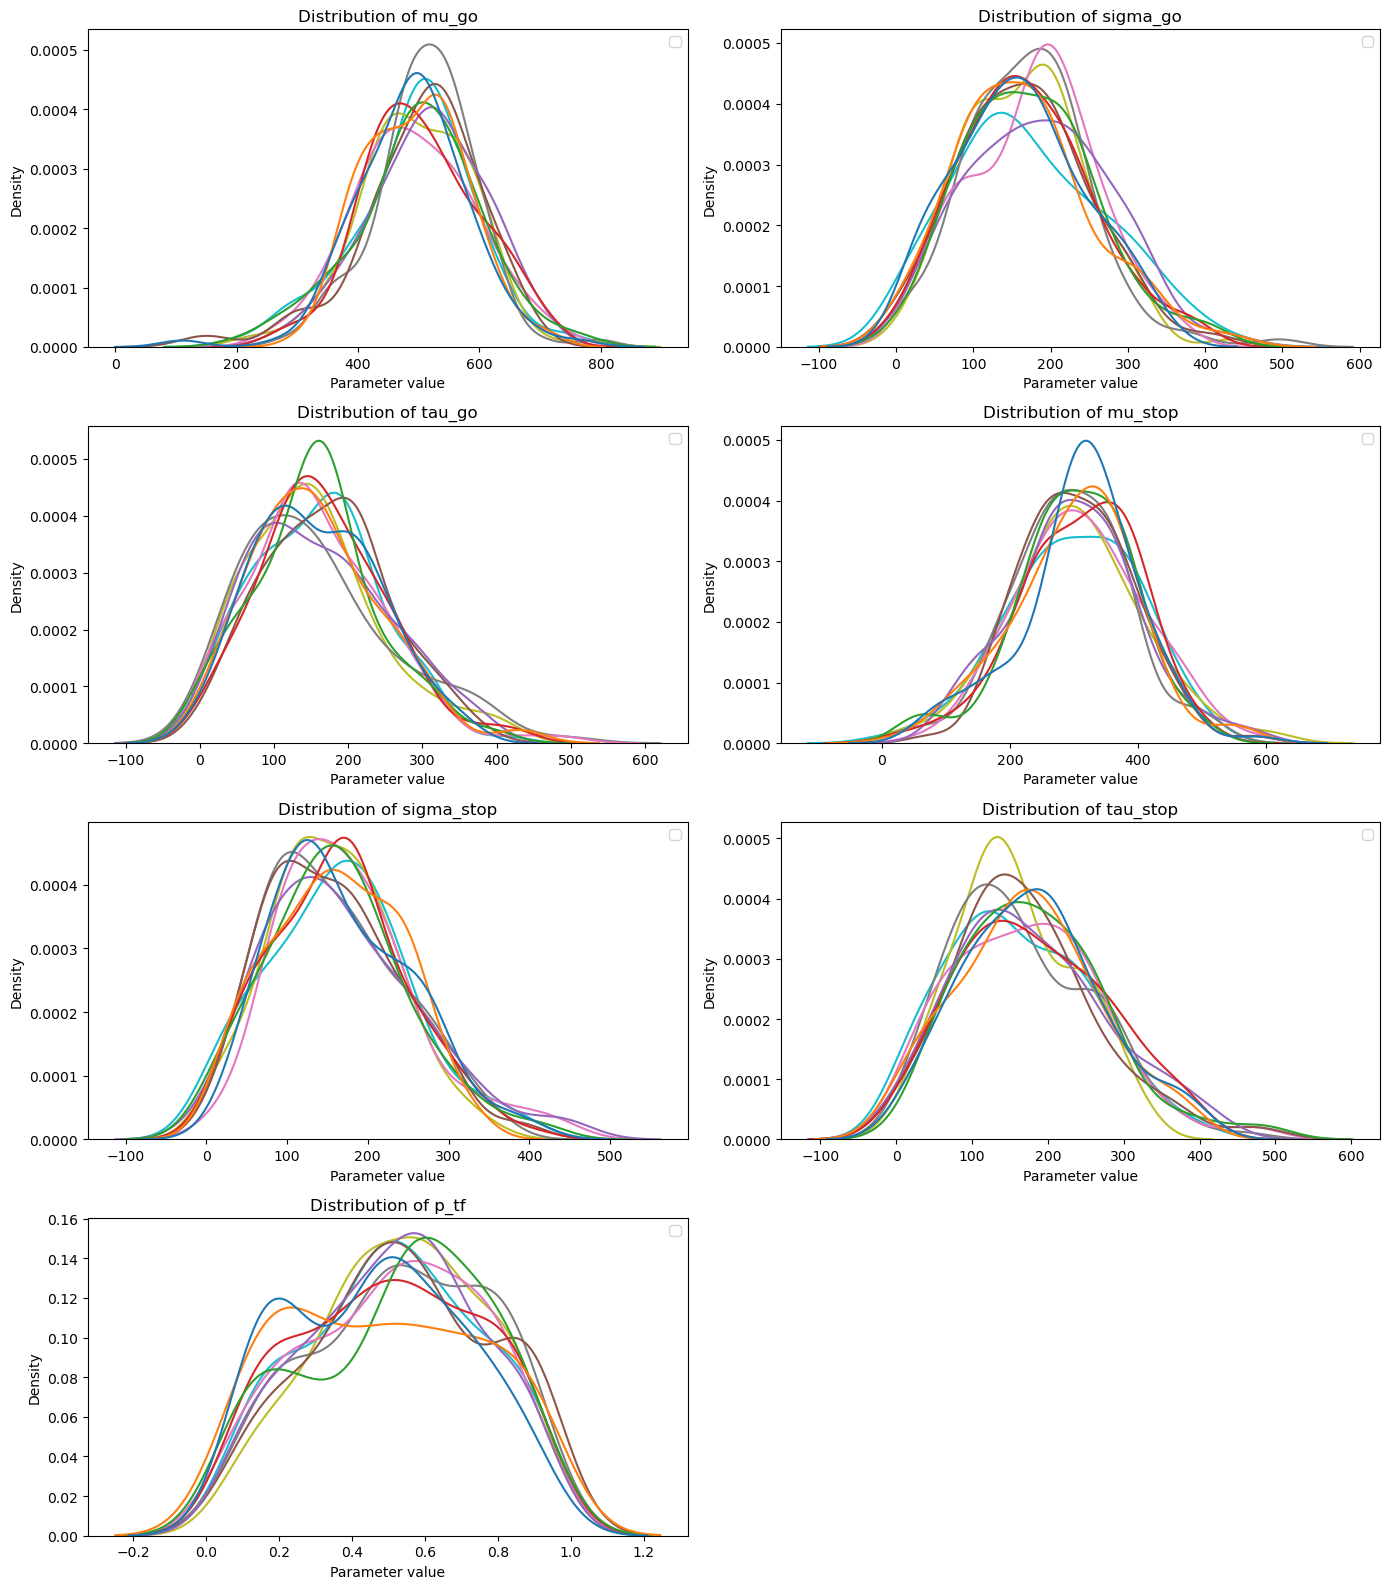

In [15]:
# Extract the samples for individual-level parameters
mu_go_samples, sigma_go_samples, tau_go_samples, mu_stop_samples, sigma_stop_samples, tau_stop_samples, p_tf_samples = draws

# Define the list of samples and their labels
samples = [mu_go_samples, sigma_go_samples, tau_go_samples, mu_stop_samples, sigma_stop_samples, tau_stop_samples, p_tf_samples]
labels = ['mu_go', 'sigma_go', 'tau_go', 'mu_stop', 'sigma_stop', 'tau_stop', 'p_tf']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

# Plot each parameter's KDE in a separate subplot
for i, (sample, label) in enumerate(zip(samples, labels)):
    sns.kdeplot(sample, ax=axes[i])
    axes[i].set_title(f'Distribution of {label}')
    axes[i].set_xlabel('Parameter value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Hide the last subplot (if any)
if len(samples) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

PARTICIPANT_ID = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

true_parameters_df = pd.read_csv("../simulation/true_param/hierarchical_true_parameters_fixed_SSD.csv")
true_parameters_df = true_parameters_df.loc[PARTICIPANT_ID]
true_parameters_df.head()

,participant_id,mu_go,sigma_go,tau_go,mu_stop,sigma_stop,tau_stop,p_tf
0,0,487.659572,67.403128,67.897897,259.542262,131.707815,117.951651,0.683748
1,1,458.768309,111.627980,155.722444,288.734216,96.941136,365.033115,0.886347
2,2,188.878182,130.303516,140.393060,430.972618,216.040322,240.728056,0.865026
3,3,486.189407,40.671572,235.365017,455.153787,185.901817,3.121580,0.303983
4,4,586.142297,241.973991,170.202470,333.881002,247.284981,183.288931,0.913064
